In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pathlib import Path
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def load_dataset(dataset_dir):
    dataset_list = []
    # Note: It's very important to load the images in the correct numerical order!
    # print(
    for image_file in list(sorted(Path(dataset_dir).glob("*.png"), key=lambda filename: int(filename.name.rstrip(".png")))):
        print(image_file)
        dataset_list.append(cv2.imread(str(image_file), cv2.IMREAD_GRAYSCALE))
    return np.stack(dataset_list, axis=0)

labels_train = pd.read_csv("Y_train.csv", index_col=0).T
data_train = load_dataset("X_train")
data_test = load_dataset("X_test")

X_train/0.png
X_train/1.png
X_train/2.png
X_train/3.png
X_train/4.png
X_train/5.png
X_train/6.png
X_train/7.png
X_train/8.png
X_train/9.png
X_train/10.png
X_train/11.png
X_train/12.png
X_train/13.png
X_train/14.png
X_train/15.png
X_train/16.png
X_train/17.png
X_train/18.png
X_train/19.png
X_train/20.png
X_train/21.png
X_train/22.png
X_train/23.png
X_train/24.png
X_train/25.png
X_train/26.png
X_train/27.png
X_train/28.png
X_train/29.png
X_train/30.png
X_train/31.png
X_train/32.png
X_train/33.png
X_train/34.png
X_train/35.png
X_train/36.png
X_train/37.png
X_train/38.png
X_train/39.png
X_train/40.png
X_train/41.png
X_train/42.png
X_train/43.png
X_train/44.png
X_train/45.png
X_train/46.png
X_train/47.png
X_train/48.png
X_train/49.png
X_train/50.png
X_train/51.png
X_train/52.png
X_train/53.png
X_train/54.png
X_train/55.png
X_train/56.png
X_train/57.png
X_train/58.png
X_train/59.png
X_train/60.png
X_train/61.png
X_train/62.png
X_train/63.png
X_train/64.png
X_train/65.png
X_train/66.png
X_tra

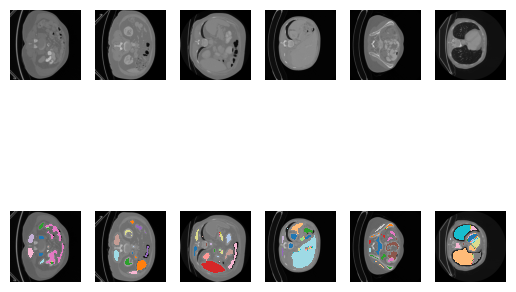

In [28]:
fig, ax = plt.subplots(2, 6)
fig.subplots_adjust(wspace=None, hspace=None)
# fig.tight_layout()
for i in range(6):
     # = plt.plot()
    ax[0, i].imshow(data_train[i], cmap="gray")
    # ax[1, i].imshow()
    ax[1, i].imshow(data_train[i], cmap="gray")
    # print(len(np.unique(seg)))
    seg_masked = np.ma.masked_where(labels_train.iloc[i].values.reshape((512, 512)) == 0, labels_train.iloc[i].values.reshape((512, 512)))
    ax[1, i].imshow(seg_masked, cmap="tab20")
    ax[0, i].axis('off')
    ax[1, i].axis('off')

# plt.show()
plt.savefig("fig.png")

In [3]:
labels = labels_train.iloc[:400]
data = data_train[:400]
file_name = [str(i) for i in range(400)]
dest_dir = "/home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss/Raidium/datamodel"
data_train, data_val, labels_train, labels_val, name_train, name_val = train_test_split(data, labels, file_name, test_size=0.15, random_state=42)

In [ ]:
# labels = labels_train
# data = data_train
# dest_dir = "/home/infres/jajdenbaum/SimCLR/Raidium/datamodel"
# data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=0.33, random_state=42)

In [4]:
from skimage.measure import label
from skimage.morphology import opening

seg_dir = "/home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss/CVC_ClinicDB/03_17_2024__05_59_00_fcb/Image/Seg_np"
segs = np.zeros((len(data_val), 512, 512))
for i in range(len(data_val)):
    print(i)
    seg = np.load(os.path.join(seg_dir, f"{i+1}_0.npy"))
    size = 3
    operator = np.ones((size, size))
    seg = opening(seg, operator)
    seg = Image.fromarray(seg.astype('uint8'))
    seg = seg.resize((512, 512))
    seg = np.array(seg)
    seg = label(seg)
    segs[i] = seg

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


(60, 512, 512)
48


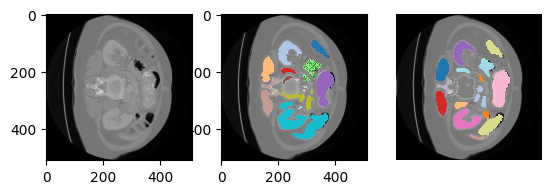

(60, 512, 512)
48


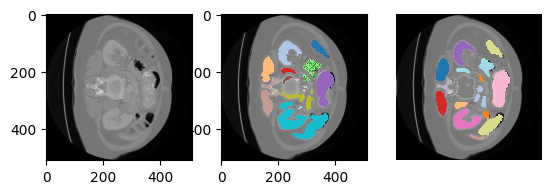

(60, 512, 512)
38


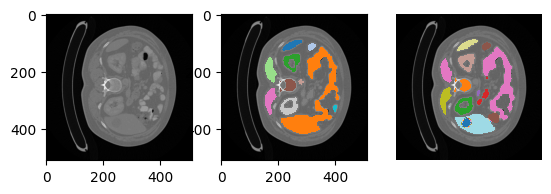

(60, 512, 512)
28


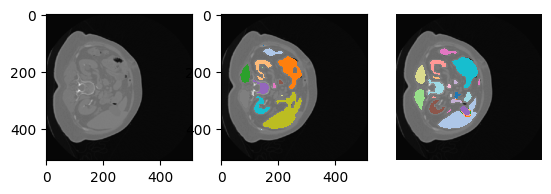

(60, 512, 512)
4


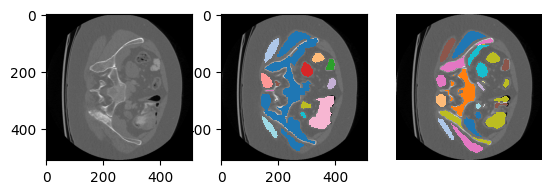

(60, 512, 512)
17


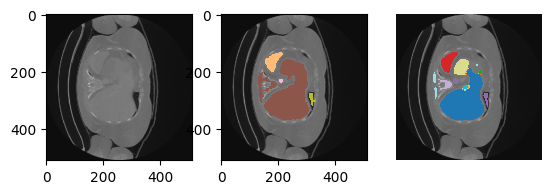

(60, 512, 512)
39


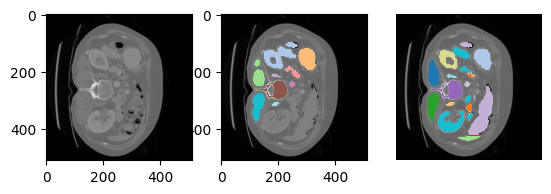

(60, 512, 512)
42


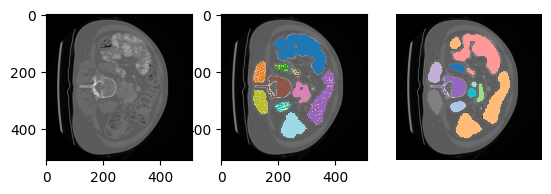

(60, 512, 512)
18


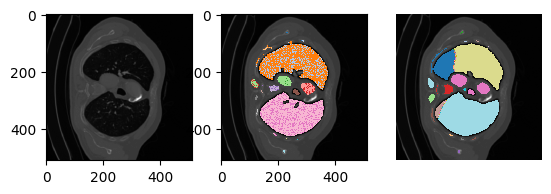

(60, 512, 512)
21


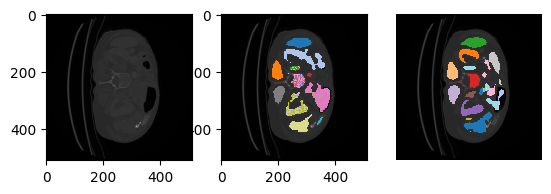

In [24]:
def plot_slice_seg(slice_image, seg, truth = None):
    if truth is None : 
        fig, axes = plt.subplots(1, 2)
    else:
        fig, axes = plt.subplots(1, 3)
    axes[0].imshow(slice_image, cmap="gray")
    axes[1].imshow(slice_image, cmap="gray")
    # print(len(np.unique(seg)))
    seg_masked = np.ma.masked_where(seg.reshape((512,512)) == 0, (seg.reshape((512,512))))
    axes[1].imshow(seg_masked, cmap="tab20")
    plt.axis("off")
    if truth is not None:
        axes[2].imshow(slice_image, cmap="gray")
        seg_masked = np.ma.masked_where(truth.reshape((512,512)) == 0, (truth.reshape((512,512))))
        axes[2].imshow(seg_masked, cmap="tab20")
        plt.axis("off")
segs = segs[:len(data_val)]
for j in range(10):
    i = np.random.randint(0, len(segs))
    print(segs.shape)
    print(i)
    # plot_slice_seg(data_test[i],segs[i])
    plot_slice_seg(data_val[i],segs[i], labels_val.iloc[i].values)
    plt.show()

In [25]:
import sklearn

def rand_index_dataset(y_true_df: pd.DataFrame, y_pred_df: pd.DataFrame) -> float:
    """Compute the individual rand index for each sample in the dataset and then average it"""
    individual_rand_index = []
    for row_index in range(y_true_df.values.shape[0]):
        labels = y_true_df.values[row_index]
        preds = y_pred_df.values[row_index]
        individual_rand_index.append(sklearn.metrics.adjusted_rand_score(labels, preds))
    return np.mean(individual_rand_index)

segs_df = pd.DataFrame(np.stack(segs, axis=0).reshape((len(segs), -1)))
rand_index_dataset(labels_val, segs_df)

0.8480728236392782

In [67]:
list_columns = [str(i)+".png" for i in range(500)]
segs_df = pd.DataFrame(np.stack(segs, axis=0).reshape((len(segs), -1)).T.astype(np.uint8), columns=list_columns)
# segs_df.to_csv("segs.csv")
segs_df.head()

ValueError: Shape of passed values is (262144, 60), indices imply (262144, 500)

In [37]:
list_columns = [str(i)+".png" for i in range(segs.shape[0])]
# print(a)
index = [f"Pixel {i}" for i in range(segs.shape[1]*segs.shape[2])]
segs_df[""] = index
keys_new = [""]
print(segs_df.keys())
for key in list(segs_df.keys()):
    keys_new.append(key)
segs_df=segs_df.reindex(columns=keys_new)

segs_df.to_csv("segs.csv", index=False)

# # # print(len(segs_df))
# segs_df.head()

Index(['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png',
       '8.png', '9.png',
       ...
       '491.png', '492.png', '493.png', '494.png', '495.png', '496.png',
       '497.png', '498.png', '499.png', ''],
      dtype='object', length=501)


In [34]:
# !nano segs.csv
print(segs_df.keys())
keys_new = ['Index']
for key in list(segs_df.keys()):
    keys_new.append(key)
print(keys_new[:-1])
segs_df=segs_df.reindex(columns=keys_new)
segs_df.to_csv()
# segs_df.head()

Index(['Index', 'Index', '0.png', '1.png', '2.png', '3.png', '4.png', '5.png',
       '6.png', '7.png',
       ...
       '490.png', '491.png', '492.png', '493.png', '494.png', '495.png',
       '496.png', '497.png', '498.png', '499.png'],
      dtype='object', length=502)
['Index', 'Index', 'Index', '0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png'

ValueError: cannot reindex on an axis with duplicate labels

In [68]:
# df = pd.read_csv("y_random_LtRTVKl_nEYsWYc.csv")
df.head()
print(len(df))

262144


In [195]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m_%d_%Y__%H_%M_%S")
print(date_time)

if os.path.exists("results.csv"):
    df = pd.read_csv("results.csv")
else:
    df = pd.DataFrame(columns=["out", "kappa", "lambda", "model", "loss"])

ligne = pd.DataFrame(np.random.randint(0, 10, (1, 5)), columns=["out", "kappa", "lambda", "model", "loss"])
df = pd.concat([df, ligne])
df.to_csv("results.csv", index=False)
# !rm results.csv
df
# dfpd.DataFrame(columns=["out", "kappa", "lambda", "model", "loss"])

03_17_2024__05_08_58


,out,kappa,lambda,model,loss
0,4,5,9,1,7
1,4,7,6,5,2
2,1,6,3,0,5
3,8,8,0,6,4
4,9,2,3,4,5
5,2,4,5,6,1
0,6,7,9,4,2


In [202]:
a = os.popen("nvidia-smi --query-gpu=memory.free --format=csv").read()

In [225]:
import time 
import subprocess
import threading

models = ["unet", 'trans_unet', 'fcb']
args = []
for model in models:
    args.append({"model": model})

workers = []
while len(args)>0:
    a = os.popen("nvidia-smi --query-gpu=memory.free --format=csv").read()
    for i, ligne in enumerate(a.split("\n")[1:-1]):
        if int(ligne[:-4]) > 10000:
            now = datetime.now()
            date_time = now.strftime("%m_%d_%Y__%H_%M_%S")
            arg = args.pop()
            command = f'python3 /home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss/CVC_ClinicDB/train.py --path "/home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss//Raidium/" -g {i} -o {date_time} -e 1 -b 16 -s 0 -mo {arg["model"]} -lo Atvmf -c 2'
            # a = subprocess.Popen([command])
            workers.append(threading.Thread(target= os.system(command)))
            workers[-1].start()
            break
    time.sleep(1)

for worker in workers:
    worker.join()

Traceback (most recent call last):
  File "/home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss/CVC_ClinicDB/train.py", line 19, in <module>
    from TransUnet.vit_seg_modeling import VisionTransformer as ViT_seg
  File "/home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss/CVC_ClinicDB/TransUnet/vit_seg_modeling.py", line 19, in <module>
    from . import vit_seg_configs as configs
  File "/home/infres/jajdenbaum/Adaptive_t-vMF_Dice_loss/CVC_ClinicDB/TransUnet/vit_seg_configs.py", line 1, in <module>
    import ml_collections
ModuleNotFoundError: No module named 'ml_collections'
Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/infres/jajdenbaum/miniconda3/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/home/infres/jajdenbaum/miniconda3/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
TypeError: 'int' object is not callable
Traceback (most recent call last):
  File "/home/infres/jajdenbau

In [6]:
X = data_val.reshape((data_val.shape[0], 1, data_val.shape[1], data_val.shape[2]))
Y = segs.reshape((data_val.shape[0], 1, data_val.shape[1], data_val.shape[2]))

print(X.shape)
# print(outputs.shape)
print(Y.shape)

(60, 1, 512, 512)
(60, 1, 512, 512)


In [30]:
n_cats = 30
Y = np.zeros((outputs.shape[0], n_cats, outputs.shape[1], outputs.shape[2]))

for i in range(n_cats):
    Y[:, i, :, :] = outputs == i
    
# print(outputs_cat.shape)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, transforms
from PIL import Image

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Assuming input images are grayscale, thus in_channels=1. 
        # Adjust if you have different channels in the input images
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)
        # self.maxpool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        self.conv3 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        # self.maxpool2 = nn.functional.max_pool2d()
        self.conv4 = nn.Conv2d(4, 1, kernel_size=3, padding=1) # Output 3 channels
        # self.maxpool3 = nn.functional.max_pool2d()
        self.activation = nn.ReLU()
        self.flatten = nn.Flatten()
        self.mlp1 = nn.Linear(8192, 128*128)
        

    def forward(self, x):
        x = self.activation(self.conv1(x))
        # x = self.maxpool(x)
        # x = self.activation(self.conv2(x))
        # x = self.maxpool(x)
        # x = self.activation(self.conv3(x))
        # x = self.maxpool(x)
        x = self.conv4(x)
        # x = self.maxpool(x)
        # x = self.mlp1(self.flatten(x))
        return x

# Dataset & Dataloader (customize this according to your dataset)
transform = transforms.Compose([transforms.Resize((128, 128))])


# dataset = datasets.FakeData(size=100, image_size=(1, 512, 512), transform=transform)  # Replace with your actual dataset
inputs_tensor = transform(torch.tensor(X, dtype=torch.float32))  # Ensure the type matches your model's expected input
labels_tensor = transform(torch.tensor(Y, dtype=torch.float32))

dataset = TensorDataset(inputs_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Model, Loss, and Optimizer
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.MSELoss()  # Assuming a regression problem; change if necessary
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 100  # Set the number of epochs
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(dataloader):
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs.reshape((outputs.shape[0], 128, 128)), targets)
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(dataloader)}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/100], Step [10/15], Loss: 179.0562
Epoch [2/100], Step [10/15], Loss: 133.1346
Epoch [3/100], Step [10/15], Loss: 89.2629
Epoch [4/100], Step [10/15], Loss: 66.2637
Epoch [5/100], Step [10/15], Loss: 52.1488
Epoch [6/100], Step [10/15], Loss: 34.9171
Epoch [7/100], Step [10/15], Loss: 28.6246
Epoch [8/100], Step [10/15], Loss: 20.1366
Epoch [9/100], Step [10/15], Loss: 11.1961
Epoch [10/100], Step [10/15], Loss: 16.8217
Epoch [11/100], Step [10/15], Loss: 21.0714
Epoch [12/100], Step [10/15], Loss: 12.8654
Epoch [13/100], Step [10/15], Loss: 15.3761
Epoch [14/100], Step [10/15], Loss: 12.8456
Epoch [15/100], Step [10/15], Loss: 11.4865
Epoch [16/100], Step [10/15], Loss: 7.2250
Epoch [17/100], Step [10/15], Loss: 11.4305
Epoch [18/100], Step [10/15], Loss: 5.8583
Epoch [19/100], Step [10/15], Loss: 14.9419
Epoch [20/100], Step [10/15], Loss: 18.5999
Epoch [21/100], Step [10/15], Loss: 12.9384
Epoch [22/100], Step [10/15], Loss: 10.4320
Epoch [23/100], Step [10/15], Loss: 8.843

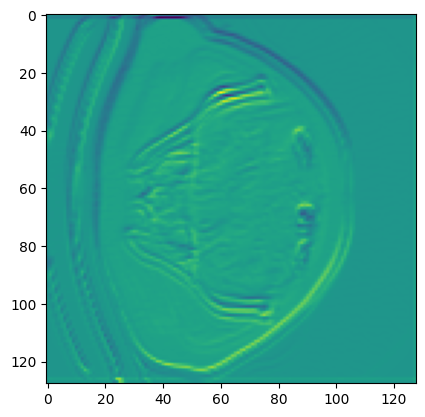

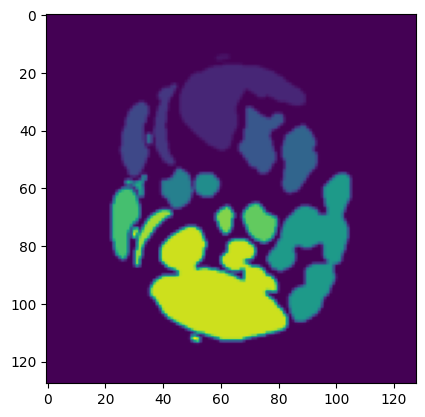

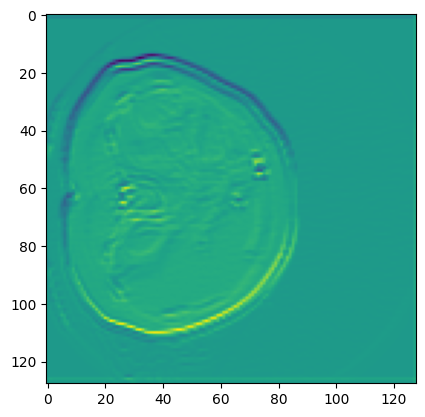

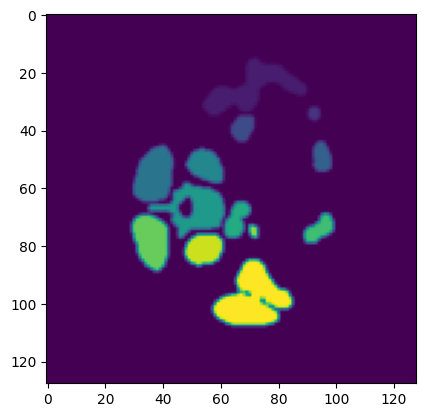

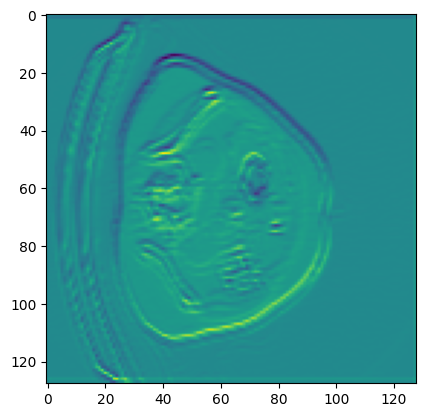

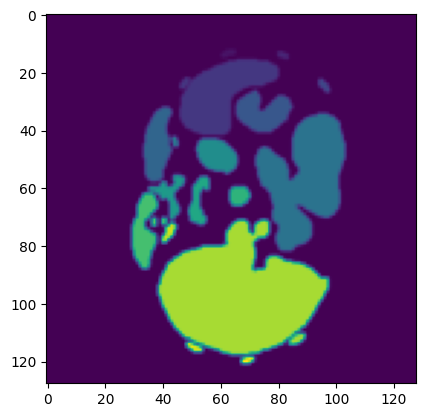

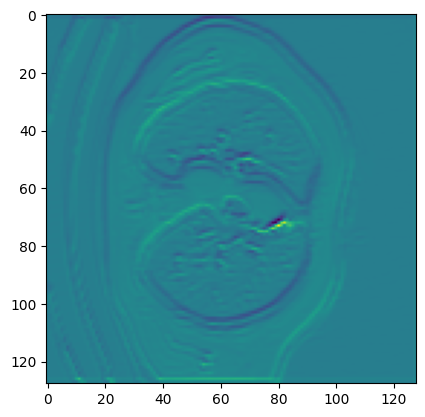

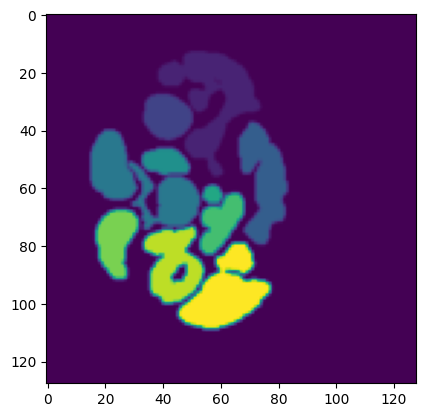

IndexError: index 4 is out of bounds for dimension 0 with size 4

In [25]:
for i in range(10):
    plt.imshow(np.array(outputs[i, 0, :, :].detach().cpu()))
    plt.show()
    plt.imshow(np.array(targets[i, 0, :, :].detach().cpu()))
    plt.show()
print(np.min(np.array(outputs[0, 0, :, :].detach().cpu())))